# Trying to clean the dataset

- we have data from 17th Dec 2021 13:00 till 30th Nov 2022 23:00, hourly data is what we have


- total of 8627 data points

- we only have 4980 data points in the acutal data set, so almost 43% of data is missing 

## Actual Code

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("data_3_clean.csv", index_col=0)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Reference,Sensor,diff
1,2021-12-17 13:00:00,31.865,48.250000,0.514201
2,2021-12-17 14:00:00,34.200,47.333333,0.384016
3,2021-12-17 15:00:00,31.200,45.333333,0.452991
4,2021-12-17 16:00:00,34.600,55.250000,0.596821
5,2021-12-17 17:00:00,43.600,72.750000,0.668578


In [3]:
df['Timestamp']

1      2021-12-17 13:00:00
2      2021-12-17 14:00:00
3      2021-12-17 15:00:00
4      2021-12-17 16:00:00
5      2021-12-17 17:00:00
               ...        
4976   2022-11-30 19:00:00
4977   2022-11-30 20:00:00
4978   2022-11-30 21:00:00
4979   2022-11-30 22:00:00
4980   2022-11-30 23:00:00
Name: Timestamp, Length: 4980, dtype: datetime64[ns]

In [4]:
df.shape

(4980, 4)

In [5]:
df.set_index('Timestamp', inplace=True)
df.head()

,Reference,Sensor,diff
Timestamp,,,
2021-12-17 13:00:00,31.865,48.250000,0.514201
2021-12-17 14:00:00,34.200,47.333333,0.384016
2021-12-17 15:00:00,31.200,45.333333,0.452991
2021-12-17 16:00:00,34.600,55.250000,0.596821
2021-12-17 17:00:00,43.600,72.750000,0.668578


In [6]:
print(f"df.shape = {df.shape}")
df_1 = df.resample('H').asfreq()
print(f"df1_shape = {df_1.shape}")

df.shape = (4980, 3)
df1_shape = (8627, 3)


In [7]:
df_1.index

DatetimeIndex(['2021-12-17 13:00:00', '2021-12-17 14:00:00',
               '2021-12-17 15:00:00', '2021-12-17 16:00:00',
               '2021-12-17 17:00:00', '2021-12-17 18:00:00',
               '2021-12-17 19:00:00', '2021-12-17 20:00:00',
               '2021-12-17 21:00:00', '2021-12-17 22:00:00',
               ...
               '2022-12-11 14:00:00', '2022-12-11 15:00:00',
               '2022-12-11 16:00:00', '2022-12-11 17:00:00',
               '2022-12-11 18:00:00', '2022-12-11 19:00:00',
               '2022-12-11 20:00:00', '2022-12-11 21:00:00',
               '2022-12-11 22:00:00', '2022-12-11 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=8627, freq='H')

In [46]:
df_1.to_csv('df_1.csv', index=True)

In [8]:
x = df_1[['Sensor']]
x.head()

,Sensor
Timestamp,
2021-12-17 13:00:00,48.250000
2021-12-17 14:00:00,47.333333
2021-12-17 15:00:00,45.333333
2021-12-17 16:00:00,55.250000
2021-12-17 17:00:00,72.750000


In [9]:
x.isnull().sum()

Sensor    3647
dtype: int64

In [19]:
x_1 = x.interpolate(method='time')

In [ ]:
x_1.to_csv('x_1.csv', index=True)

In [53]:
x.fillna(0, inplace=True)
x.isnull().sum()

/Users/arnav39/Desktop/project1/venv/lib/python3.10/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Sensor    0
dtype: int64

In [55]:
x['diff_order_1'] = x['Sensor'].diff()
x.head()

/var/folders/nk/gxdrmky141939n91br_2qdlh0000gn/T/ipykernel_40284/1548751907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['diff_order_1'] = x['Sensor'].diff()


,Sensor,diff_order_1
Timestamp,,
2021-12-17 13:00:00,48.250000,NaN
2021-12-17 14:00:00,47.333333,-0.916667
2021-12-17 15:00:00,45.333333,-2.000000
2021-12-17 16:00:00,55.250000,9.916667
2021-12-17 17:00:00,72.750000,17.500000


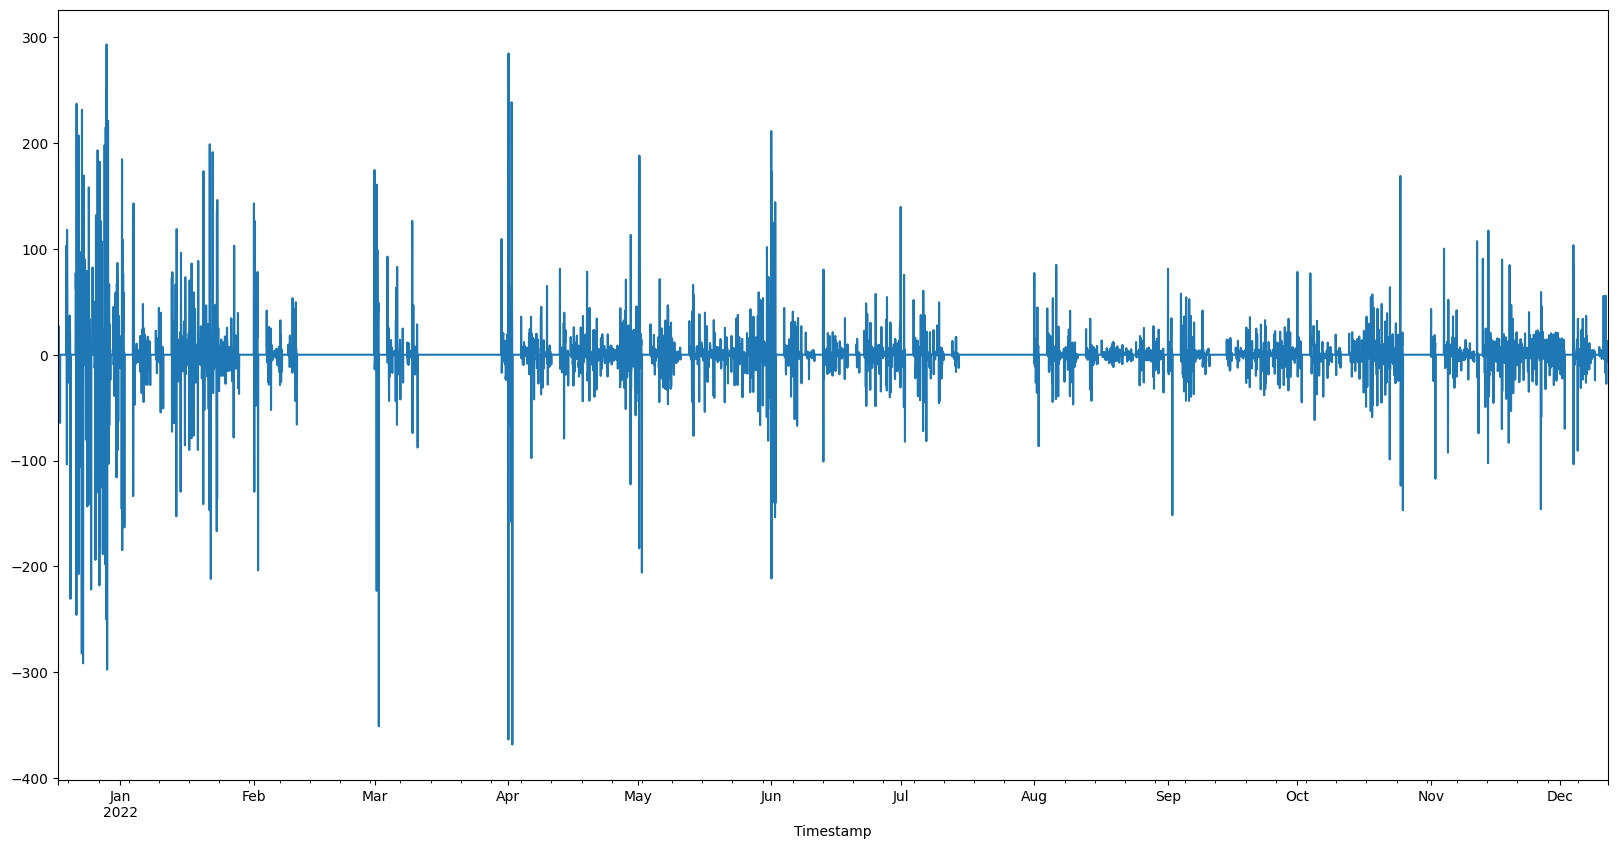

In [58]:
x['diff_order_1'].plot(figsize=(20, 10))
plt.savefig('diff_order_1.png')

In [66]:
max_idx = x.diff_order_1.max()
print(max_idx)

293.25


In [68]:
x[x['diff_order_1'] == 293.25]

,Sensor,diff_order_1
Timestamp,,
2021-12-28 21:00:00,293.25,293.25
